# Regression Modeling in Practice
### Week 3: Test a Multiple Regression Model

I am finally ready to examine the relationship between my response variable, internetuserate, and several other explanatory variables simultaneously, with a multiple regression model. Initially, I examined as explanatory variables incomeperperson, employrate, femaleemployrate, and polityscore. However, polityscore exhibited very high p-values so I dropped it from the analysis.

Load the data and set the variables to numeric

In [20]:
'''
Code for Peer-graded Assignments: Test a Multiple Regression Model
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

data = pd.read_csv('c:/users/greg/desktop/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')

Center the explanatory variables

In [21]:
data_centered = data.copy()
data_centered['incomeperperson'] = data_centered['incomeperperson'].subtract(data_centered['incomeperperson'].mean())
data_centered['employrate'] = data_centered['employrate'].subtract(data_centered['employrate'].mean())
data_centered['femaleemployrate'] = data_centered['femaleemployrate'].subtract(data_centered['femaleemployrate'].mean())

print ('Mean of', data_centered[['incomeperperson']].mean())
print ('Mean of', data_centered[['employrate']].mean())
print ('Mean of', data_centered[['femaleemployrate']].mean())

Mean of incomeperperson   -3.934761e-12
dtype: float64
Mean of employrate   -2.674515e-15
dtype: float64
Mean of femaleemployrate    5.808088e-15
dtype: float64


After centering, the means do not exactly equal zero due to errors with float representation; but they are essentially zero.

#### Single regression

Run scatterplot of internetuserate with centered incomeperperson

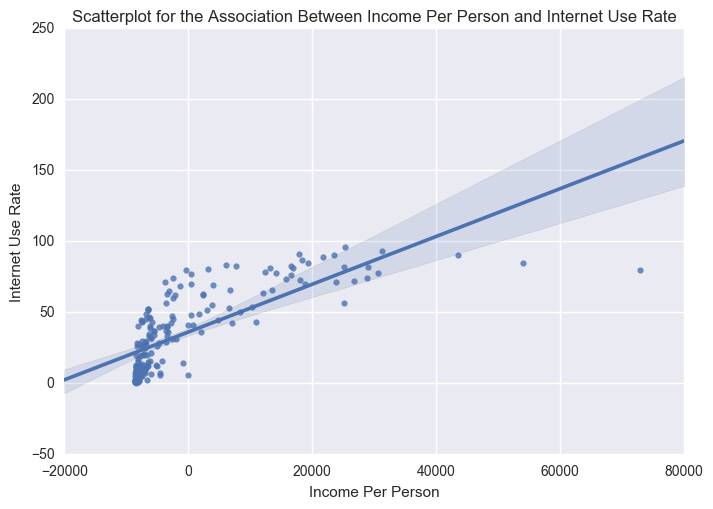

In [28]:
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
sns.plt.show()

OLS regression model for the association between income per person and internet use rate

In [23]:
reg1 = smf.ols('internetuserate ~ incomeperperson', data=data_centered).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.89e-34
Time:                        16:28:00   Log-Likelihood:                -792.90
No. Observations:                 183   AIC:                             1590.
Df Residuals:                     181   BIC:                             1596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          36.0622      1.371     26.308      0.000        33.357    38.767
incomeperperson     0.0017      0.000     15.299      0.000         0.001     0.002
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                5.081
Skew:                           0.012   Prob(JB):                       0.0788
Kurtosis:                       3.816   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Multiple regression
OLS regression model for the association between income per person, employment rate, and female employment rate, and internet use rate

In [24]:
reg2 = smf.ols('internetuserate ~ incomeperperson + employrate + femaleemployrate', data=data_centered).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     117.1
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           3.57e-40
Time:                        16:28:02   Log-Likelihood:                -682.74
No. Observations:                 164   AIC:                             1373.
Df Residuals:                     160   BIC:                             1386.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           36.7210      1.236     29.710      0.000        34.280    39.162
incomeperperson      0.0020      0.000     17.905      0.000         0.002     0.002
employrate          -0.8694      0.235     -3.702      0.000        -1.333    -0.406
femaleemployrate     0.2960      0.167      1.776      0.078        -0.033     0.625
==============================================================================
Omnibus:                        3.515   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.430
Skew:                           0.353   Prob(JB):                        0.180
Kurtosis:                       2.939   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Quadratic (polynomial) regression analysis

OLS regression model for the association between income per person and internet use rate

In [25]:
reg3 = smf.ols('internetuserate ~ incomeperperson + I(incomeperperson**2)', data=data_centered).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     217.0
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.10e-48
Time:                        16:28:05   Log-Likelihood:                -756.56
No. Observations:                 183   AIC:                             1519.
Df Residuals:                     180   BIC:                             1529.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  42.0672      1.297     32.444      0.000        39.509    44.626
incomeperperson             0.0028      0.000     18.849      0.000         0.002     0.003
I(incomeperperson ** 2) -3.524e-08   3.76e-09     -9.367      0.000     -4.27e-08 -2.78e-08
==============================================================================
Omnibus:                       10.865   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.791
Skew:                           0.616   Prob(JB):                      0.00275
Kurtosis:                       2.824   Cond. No.                     5.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

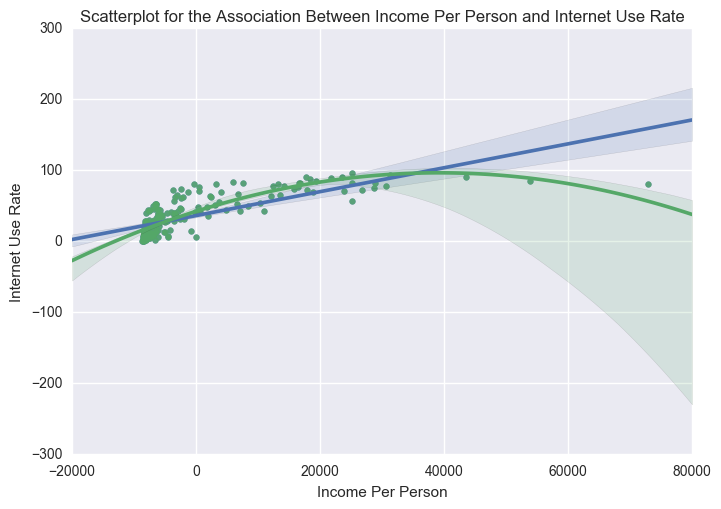

In [34]:
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
scat2 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, order=2, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
sns.plt.show()

Q-Q plot for normality

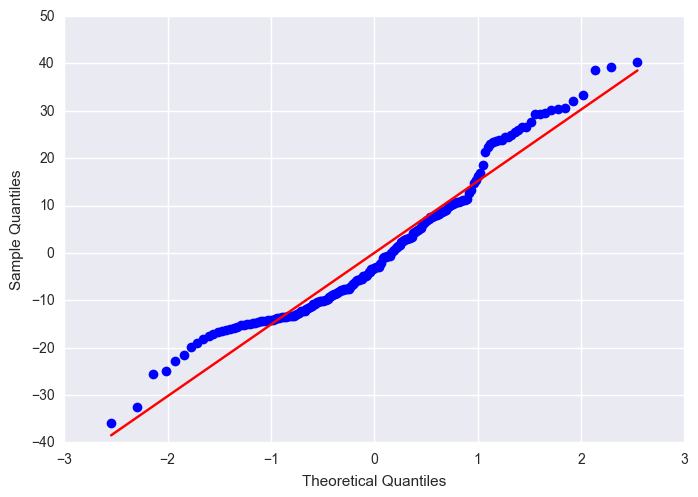

In [35]:
fig4 = sm.qqplot(reg3.resid, line='r')
fig4

Simple plot of residuals

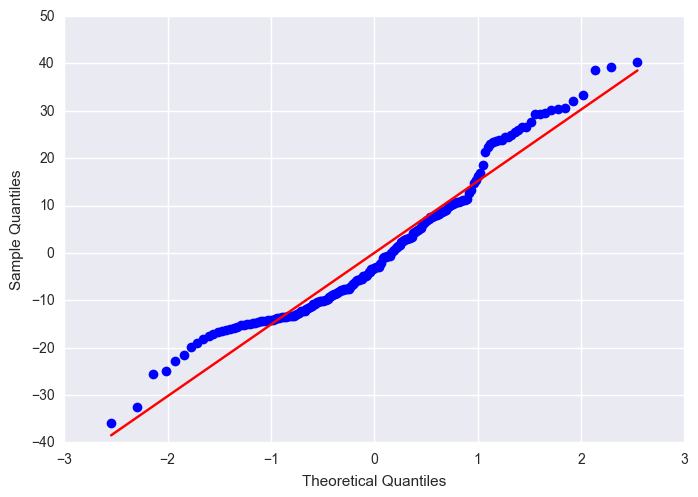

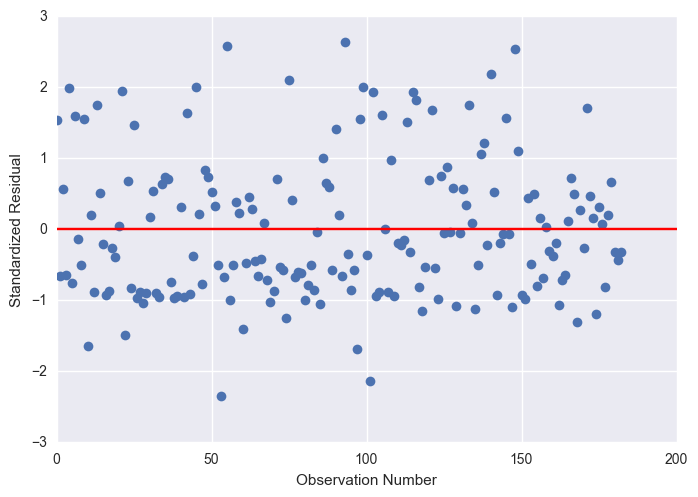

In [36]:
plt.figure()
stdres=pd.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
sns.plt.show()

Additional regression diagnostic plots

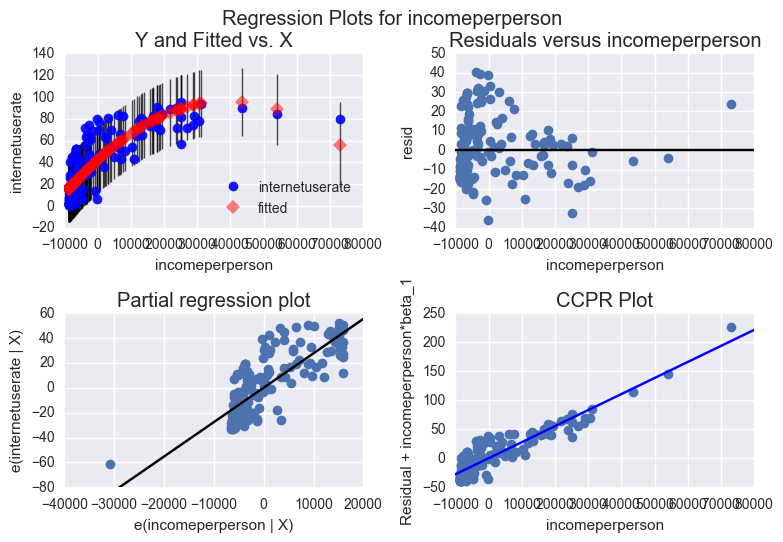

In [37]:
fig2 = plt.figure()
fig2 = sm.graphics.plot_regress_exog(reg3, "incomeperperson", fig=fig2)
fig2

Leverage plot

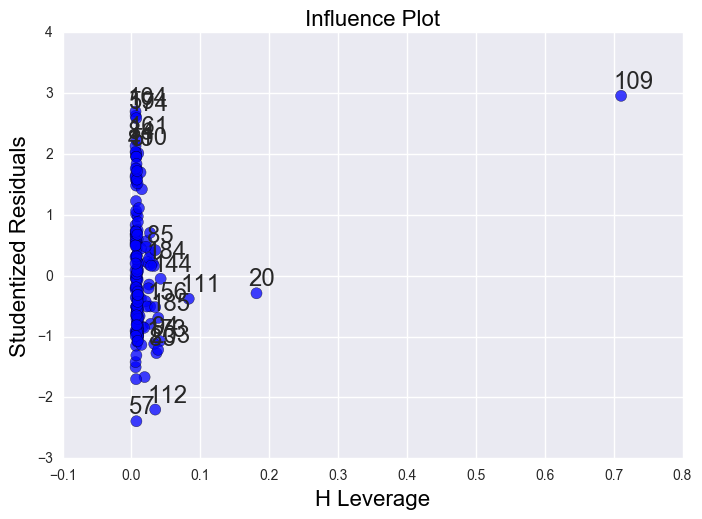

In [38]:
fig3=sm.graphics.influence_plot(reg3, size=8)
fig3

The analysis shows that internetuserate is significantly correlated with incomeperperson (p-value = 0.000) and employrate (p-value = 0.000); however, femaleemployrate is just outside the 0.05 range of significane with a p-value of 0.078. With a coefficient of 0.002, incomeperperson is slightly positively correlated with internetuserate while employrate is strongly negatively correlated, with a coefficient of -0.869. This supports my hypothesis that internetuserate could be predicted based upon incomeperperson and employrate, but it does not support my hypothesis that femaleemployrate would be a better predictor than employrate.

When I added polityscore to my analysis, it exhibited a p-value out of range of significance, but it also threw several other variables into higher (but still significant) p-value ranges. This suggests that polityscore is a confounding variable and is associated with the others, but adding it to my analysis adds no new information.

Examining the plots posted above indicates that a curved line is a much better fit for the relationship between incomeperperson and internetuserate. However, I do not believe a 2-degree polynomial line is the best; the data appears to match a logarithmic line better. Indeed, the Q-Q plot does show that the actual data is higher than predicted at the extremes and lower than predicted in the middle. This would match my theory that a logarithmic line would be a better fit. The plot of residuals is encouraging that no data points fall outside 3 standard deviations of the mean, however I am concerned that so many fall within 2-3 deviations. I attribute this to the poor fit of the polynomial line as compared to a logarithmic line. The regression plots and the influence plot show an alarming point (labled 109 in the influence plot) which is an extreme outlier in terms of both residual value and influence. This point shows up again in the plot *Residuals versus incomeperperson* and the *Partial regression plot*. I must examine what this point is and possibly exclude it from the rest of my analysis.